In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.python.keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

2023-11-24 18:22:25.886502: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-24 18:22:25.888461: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-24 18:22:25.919666: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-24 18:22:25.919719: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-24 18:22:25.919756: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

In [3]:
#Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [ ]:
#b1. Đọc ảnh từ file đã lưu, dùng open cv
#img=cv2.imread('img1.jpg')

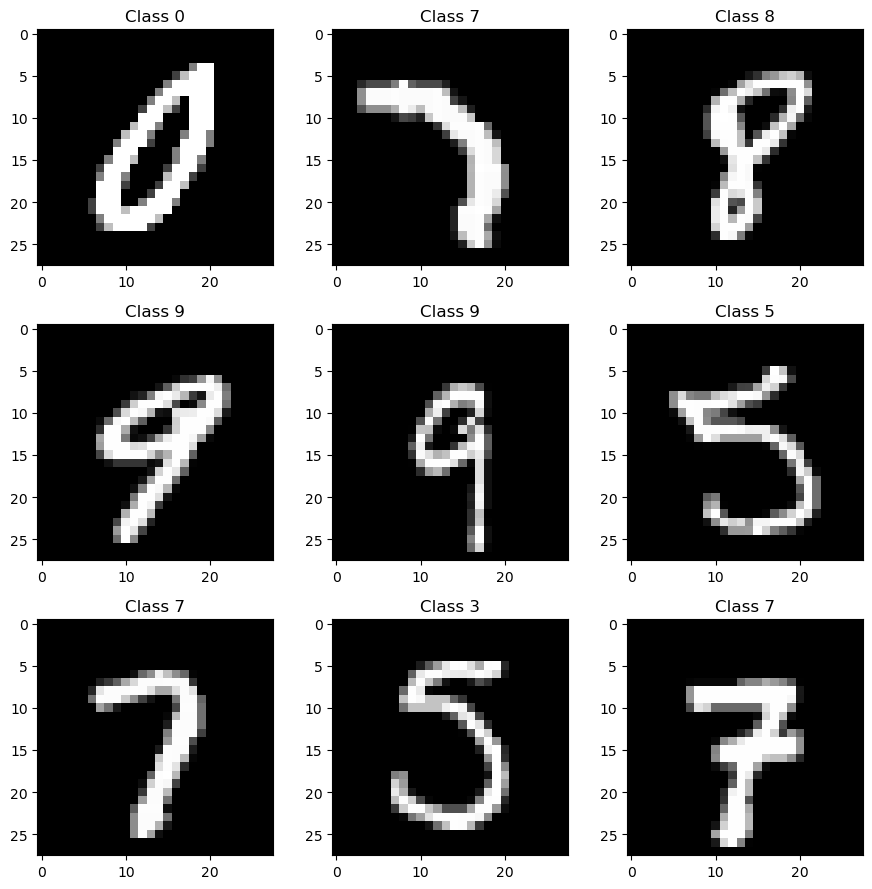

In [4]:
# Visualize some random images from the dataset
plt.rcParams['figure.figsize'] = (9, 9)
for i in range(9):
    plt.subplot(3, 3, i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))

plt.tight_layout()

In [5]:
# Reshape and preprocess the data
X_train = X_train.reshape(60000, 784) 
X_test = X_test.reshape(10000, 784)   
X_train = X_train.astype('float32')   
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [6]:
# One-hot encode the labels
nb_classes = 10
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [7]:
# Build and train the Dense model
model_dense = Sequential([
    Dense(512, input_shape=(784,), activation='relu'),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model_dense.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_dense.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1)

# Save the Dense model
model_dense.save('dense_model.h5')

2023-11-24 18:22:29.242273: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-24 18:22:29.271741: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2508 - accuracy: 0.9255
Epoch 2/10
469/469 [==============================] - 4s 7ms/step - loss: 0.1005 - accuracy: 0.9692
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0702 - accuracy: 0.9777
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0569 - accuracy: 0.9817
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0464 - accuracy: 0.9850
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0395 - accuracy: 0.9868
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0335 - accuracy: 0.9890
Epoch 8/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0292 - accuracy: 0.9897
Epoch 9/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0283 - accuracy: 0.9908
Epoch 10/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0246 - accuracy: 0.9920

/home/thanhtugn/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
